***Ali Mehdipour-9721162221***

# ***Question1***

In [7]:
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
# بارگذاری دیتاست Iris
iris = load_iris()

# نمایش چند سطر اول داده ها
print(iris.data[:5])

# نمایش چند سطر اول هدف
print(iris.target[:5])

# نمایش نام های ویژگی ها
print(iris.feature_names)

# نمایش نام های کلاس ها
print(iris.target_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X = iris.data
y = iris.target

# استانداردسازی داده ها
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# انجام PCA با 2 مولفه اصلی
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# نمایش خروجی PCA
print(X_pca[:5])

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]]


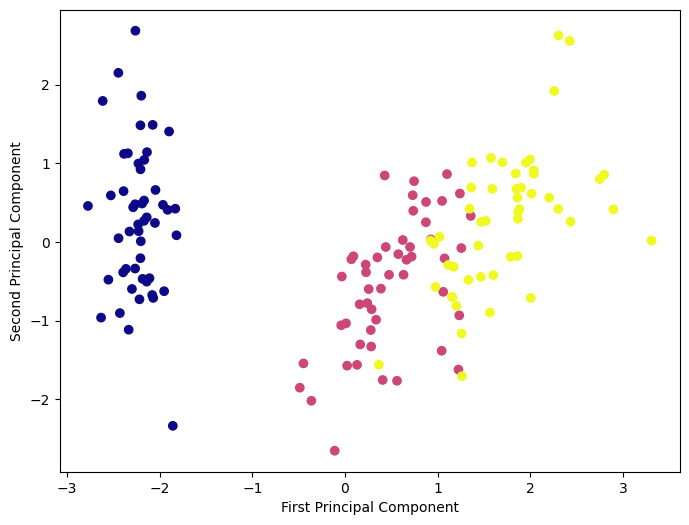

In [8]:
#رسم نتایج
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='plasma')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()


# ***Question2***

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from google.colab import drive

In [12]:
s = drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('/content/drive/My Drive/DataMining_LAB_1401T1/dmba/Real_State.csv')
df.drop('No', inplace = True,axis=1)
print(df.head())
print(df.columns)

Mounted at /content/drive
   X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             2012.917          32.0                                84.87882   
1             2012.917          19.5                               306.59470   
2             2013.583          13.3                               561.98450   
3             2013.500          13.3                               561.98450   
4             2012.833           5.0                               390.56840   

   X4 number of convenience stores  X5 latitude  X6 longitude  \
0                               10     24.98298     121.54024   
1                                9     24.98034     121.53951   
2                                5     24.98746     121.54391   
3                                5     24.98746     121.54391   
4                                5     24.97937     121.54245   

   Y house price of unit area  
0                        37.9  
1                        42.2  
2     

<Axes: xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

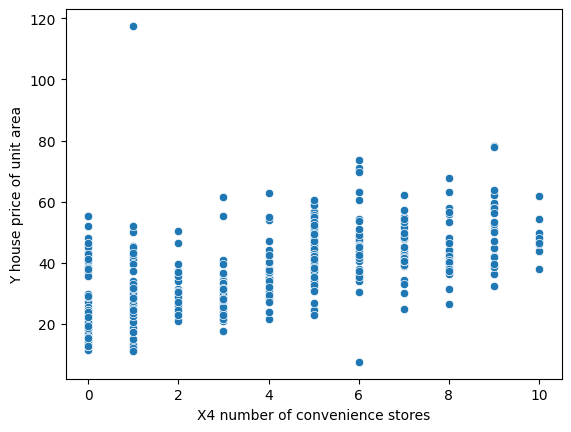

In [13]:
sns.scatterplot(x='X4 number of convenience stores',
                y='Y house price of unit area', data=df)

In [14]:
# creating feature variables
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
print(X)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [15]:
# creating train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=101)

In [16]:
# creating a regression model
model = LinearRegression()

In [17]:
# fitting the model
model.fit(X_train,y_train)

LinearRegression()

In [24]:
# making predictions
predictions = model.predict(X_test)

In [27]:
# model evaluation
print(
  'mean_squared_error(MSE) : ', mean_squared_error(y_test, predictions,squared=True))
print(
  'root_mean_square_error(RMSE) : ', mean_squared_error(y_test, predictions,squared=False))

mean_squared_error(MSE) :  46.21179783492909
root_mean_square_error(RMSE) :  6.797925995105352
